In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [77]:
import time
import pandas as pd

from astropy.io import fits
from mlz_desc.ml_codes import *

In [145]:
def prepare_df(df, z=True):
    
    features = pd.DataFrame()
    
    features['u'] = df['LSSTu']
    features['g'] = df['LSSTg']
    features['r'] = df['LSSTr']
    features['i'] = df['LSSTi']

    u_g = df['LSSTu'] - df['LSSTg']
    g_r = df['LSSTg'] - df['LSSTr']
    r_i = df['LSSTr'] - df['LSSTi']
    i_z = df['LSSTi'] - df['LSSTz']
    z_y = df['LSSTz'] - df['LSSTy']

    features['u-g'] = u_g
    features['g-r'] = g_r
    features['r-i'] = r_i
    features['i-z'] = i_z
    features['z-y'] = z_y
    
    if z:
        redshift = pd.DataFrame()
        redshift['zs'] = df['redshift']
        return(features, redshift)
    else:
        return(features)

In [65]:
training_hdus = fits.open('data/Final_Buzzard_training_file.fits')
all_training_df = pd.DataFrame(training_hdus[1].data)

In [79]:
features, redshifts = prepare_df(all_training_df)

In [67]:
u = features['u']
g = features['g']
r = features['r']
i = features['i']

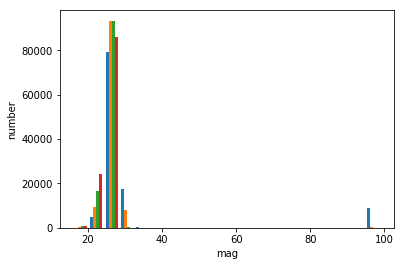

In [68]:
plt.hist([u, g, r, i], bins=20)
plt.xlabel('mag')
plt.ylabel('number')
plt.show()

In [69]:
u_g = features['u-g']
g_r = features['g-r']
r_i = features['r-i']
i_z = features['i-z']
z_y = features['z-y']

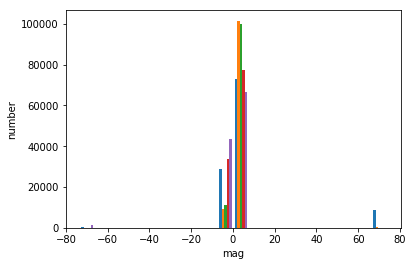

In [70]:
plt.hist([u_g, g_r, r_i, i_z, z_y], bins=20)
plt.xlabel('mag')
plt.ylabel('number')
plt.show()

In [71]:
save_path = "data/"

d = {'u': {'ind': 0}, 'g': {'ind': 1}, 'r': {'ind': 2}, 'i': {'ind': 3}, 'u-g': {'ind': 5}, 'g-r': {'ind': 6}, 
     'r-i': {'ind': 6}, 'i-z': {'ind': 6}, 'z-y': {'ind': 6}}

columns = ['mag_u_lsst','mag_g_lsst','mag_r_lsst','mag_i_lsst', 'mag_u_lsst-mag_g_lsst', 'mag_g_lsst-mag_r_lsst', 
            'mag_r_lsst-mag_i_lsst', 'mag_i_lsst-mag_z_lsst', 'mag_z_lsst-mag_y_lsst']

In [72]:
n_trees = 100
minleaf = 5

In [81]:
start_time = time.time()
Trees = [TPZ.Rtree(features.as_matrix()[::100], redshifts.as_matrix()[::100], minleaf=minleaf, mstar=3, dict_dim=d, 
                   forest='yes') for i in range(n_trees)]
print(time.time()-start_time)

126.61995792388916


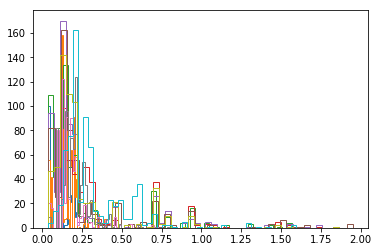

In [141]:
for i in np.arange(0,50,5):
    values = np.concatenate([T.get_vals(features.loc[i, :]) for T in Trees]).ravel()
    plt.hist(values, bins=50, histtype='step')
plt.show()

In [142]:
mean(values)

0.31966162793914249

In [143]:
testing_hdus = fits.open('data/Final_Buzzard_test_file.fits')
all_testing_df = pd.DataFrame(testing_hdus[1].data)

In [149]:
testing_df = prepare_df(all_testing_df, False)

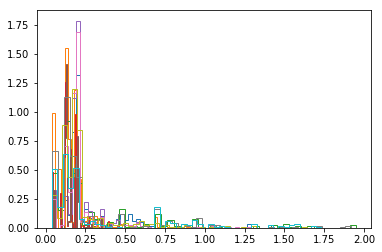

In [161]:
for i in np.arange(0,50,5):
    values = np.concatenate([T.get_vals(testing_df.loc[i, :]) for T in Trees]).ravel()
    w = np.ones_like(values) * np.sum(values)
    plt.hist(values, bins=50, weights=1/w, histtype='step')
plt.show()

In [151]:
mean(values)

0.32398490239726024

In [154]:
np.sum(values / np.sum(values))

1.0

In [158]:
np.sum(values)

189.20718299999999

In [164]:
values / np.ones_like(values) * np.sum(values)

array([ 131.82840189,   10.00414059,   18.18205346,   27.03940932,
         26.19970784,    7.25723071,   23.18128565,   29.57346112,
         34.74487184,   23.75552945,   37.48099692,   10.00414059,
         24.7157559 ,    7.25723071,   23.18128565,   29.57346112,
         34.74487184,   38.70705946,   23.75552945,   37.48099692,
         10.00414059,   24.7157559 ,   29.57346112,   34.74487184,
         38.70705946,   23.75552945,   34.38424295,   37.48099692,
         38.3392407 ,   10.00414059,   40.23566429,  166.47999459,
        180.49305698,  246.58804539,  269.0677508 ,  197.18226576,
        296.98337858,  168.68198779,  277.9339994 ,  295.11401161,
          7.25723071,   29.57346112,   23.75552945,   37.48099692,
          7.25723071,   23.18128565,   29.57346112,   34.74487184,
         38.70705946,   23.75552945,   37.48099692,   10.00414059,
         24.7157559 ,    7.25723071,   23.18128565,   29.57346112,
         23.75552945,   37.48099692,   65.8391803 ,   10.00414